# SVM 과제

이 과제는 svm에 대한 개념은 잘 이해가 되셨나요?
이번 과제로 직접 데이터에 적용해보면서 보다 명확한 이해와 사용법을 익혀가시길 바랍니다~

## Setting

In [1]:
#@title 시각화를 위한 라이브러리 설치
!pip install mglearn

In [2]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
import mglearn

## SVM 살펴보기

먼저 데이터를 준비합니다.

Iris 데이터셋은 sklearn에서 제공해주는 데이터셋으로 
Setosa, Versicolour, Virginica 이렇게 3가지 종류의 붓꽃이 있습니다.

Feature는 Sepal Length, Sepal Width, Petal Length, Petal Width로 다양하지만 시각화를 위해 앞의 2가지인 Sepal Length, Sepal Width만 가지고 분류해봅시다.😎

In [3]:
iris = datasets.load_iris()
X = iris.data[:,0:2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

그러면 이제 svm을 이용해서 학습시켜봅시다

sklearn에서 제공해주는 함수에서 무엇을 쓰면 될까요?

바로 sklearn.svm.SVC 입니다! 먼저 sklearn에서 제공해주는 공식문서부터 살펴봅시다.

[document](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

이 SVC 함수는 svm을 분류기로 사용하기 위해 지원해주는 모델입니다.


SVC 코드를 살펴보면
```
SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale',
  coef0=0.0, shrinking=True, probability=False, tol=0.001,
  cache_size=200, class_weight=None, verbose=False, 
  max_iter=- 1, decision_function_shape='ovr', 
  break_ties=False, random_state=None)
```
이렇게나 많은 옵션이 있었네요😳

## Non-Linear SVM

In [4]:
svm = SVC()
svm.fit(X_train, y_train)


print('학습용 데이터로 측정한 정확도 = %.2f' % svm.score(X_train, y_train))
print('시험용 데이터로 측정한 정확도 = %.2f' % svm.score(X_test, y_test))

학습용 데이터로 측정한 정확도 = 0.85
시험용 데이터로 측정한 정확도 = 0.73


위의 결과를 시각화를 통해 확인해볼까요?

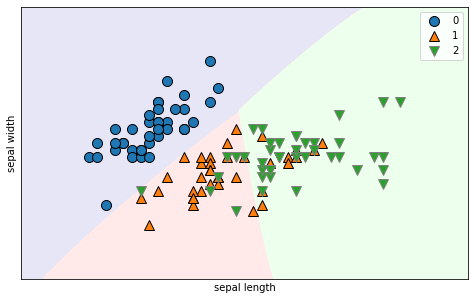

In [5]:
def draw_plot(model,xlabel,ylabel):
  plt.figure(figsize=(8, 5))
  mglearn.plots.plot_2d_classification(model, X_train, alpha=0.1)
  mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
  plt.legend()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

draw_plot(svm,'sepal length','sepal width')

## Linear SVM

이번에는 linear한 svm을 살펴봅시다!

위의 document를 참고하여 linear한 svm을 만들기 위해서는 어떤 옵션이 필요할 지 생각해 봅시다.

In [6]:
svm = SVC(
    #################
    kernel='linear'
    #################
    )
svm.fit(X_train, y_train)


print('학습용 데이터로 측정한 정확도 = %.2f' % svm.score(X_train, y_train))
print('시험용 데이터로 측정한 정확도 = %.2f' % svm.score(X_test, y_test))

학습용 데이터로 측정한 정확도 = 0.84
시험용 데이터로 측정한 정확도 = 0.73


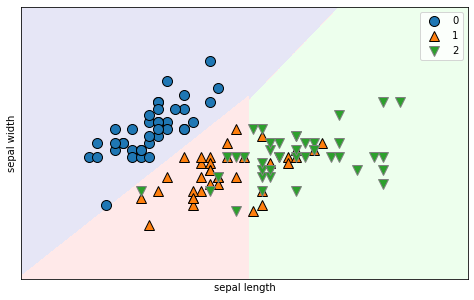

In [7]:
draw_plot(svm,'sepal length','sepal width')

## SVM 성능 높여보기

기본적인 svm 사용법에 대해서는 익혔으니까

이번에는 성능을 높여볼까요?

여러가지 옵션들이 있지만 그 중 3가지만 바꿔봅시다!

- kernel
- gamma
- C -> svm regularization parameter

### ⚠️ 여기서 퀴즈 ⚠️

Q1) kernel 종류들에는 어떤 것들이 있을까요?

```
‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
```

Q2) gamma 설정이 의미있는 kernel 모드는 무엇일까요? (힌트: 답은 복수개!)

```
‘poly’, ‘rbf’, ‘sigmoid’
```

Q3) C가 의미하는 것은 무엇일까요?

```
정규화 파라미터 입니다. 양수의 값을 가지며, 정규화의 정도는 C의 값과 반비례 합니다.
```



### 예시

In [8]:
kernel = 'poly'
gamma = 0.6
C = 0.9

svm = SVC(
    kernel=kernel,
    gamma = gamma,
    C = C
    )
svm.fit(X_train, y_train)


print('학습용 데이터로 측정한 정확도 = %.2f' % svm.score(X_train, y_train))
print('시험용 데이터로 측정한 정확도 = %.2f' % svm.score(X_test, y_test))

학습용 데이터로 측정한 정확도 = 0.84
시험용 데이터로 측정한 정확도 = 0.63


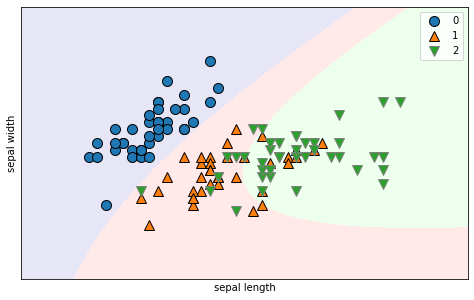

In [9]:
draw_plot(svm,'sepal length','sepal width')

흑....😭

제가 직접 바꿔보니 성능이 더 안 좋아진 것 같아요ㅠㅠㅠ😱

여러분은 왜 안 좋아진 것 같나요?? 

한 번 고민해보시고 
여러분이 좋은 파라미터 값들을 찾아주세요🤗

### 적절한 파라미터 찾아보기

In [10]:
# Grid Search를 이용한 parameter tuning
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('poly', 'rbf', 'sigmoid'), 'C':[0.1,0.3,0.5,0.7,0.9,1.0], 'gamma':[0.1,0.3,0.5,0.7,0.9,1.0]}
svm = SVC()
clf = GridSearchCV(svm, parameters)
clf.fit(X_train, y_train)
clf.best_params_

{'C': 0.3, 'gamma': 0.3, 'kernel': 'rbf'}

In [11]:
###################
kernel = 'rbf'
gamma = 0.3
C = 0.3
###################
svm = SVC(
    kernel=kernel,
    gamma = gamma,
    C = C
    )
svm.fit(X_train, y_train)


print('학습용 데이터로 측정한 정확도 = %.2f' % svm.score(X_train, y_train))
print('시험용 데이터로 측정한 정확도 = %.2f' % svm.score(X_test, y_test))

학습용 데이터로 측정한 정확도 = 0.86
시험용 데이터로 측정한 정확도 = 0.73


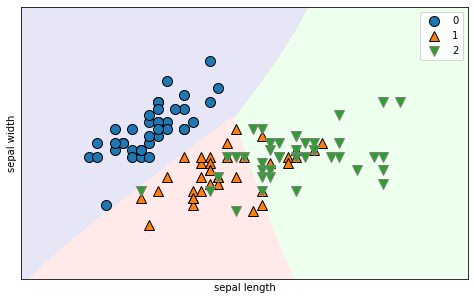

In [12]:
draw_plot(svm,'sepal length','sepal width')

### 추가로 이전에 선택해줬던 Iris의 Feature를 바꿔주면 더 높게 나올 수도 있답니다~

 - 0 : Sepal Length
 - 1 : Sepal Width
 - 2 : Petal Length
 - 3 : Petal Width

In [13]:
#########################
X = iris.data[:,[0,2]]
#########################
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [14]:
###################
kernel = 'rbf'
gamma = 0.3
C = 0.3
###################
svm = SVC(
    kernel=kernel,
    gamma = gamma,
    C = C
    )
svm.fit(X_train, y_train)


print('학습용 데이터로 측정한 정확도 = %.2f' % svm.score(X_train, y_train))
print('시험용 데이터로 측정한 정확도 = %.2f' % svm.score(X_test, y_test))

학습용 데이터로 측정한 정확도 = 0.95
시험용 데이터로 측정한 정확도 = 0.97


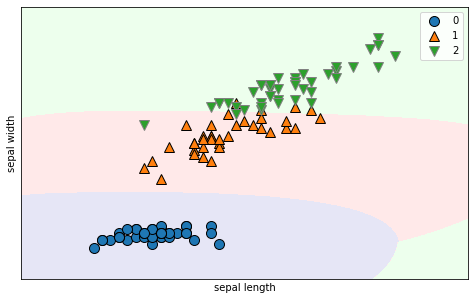

In [15]:
draw_plot(svm,'sepal length','sepal width')

# Decision Tree 과제

*사이킷런의 유방암 데이터셋을 사용합니다.*

## 1. 매개변수를 지정하지 않은 모델을 훈련시킨 후 이를 시각화로 나타내주세요. 
(데이터셋을 train test split 함수를 사용해 분리한 후, 모델을 훈련시킵니다.)

In [16]:
!pip install graphviz

In [17]:
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

feature_names = cancer.feature_names[:]

In [18]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from subprocess import call
from IPython.display import Image
import io
import pydot
import matplotlib as mpl

clf = DecisionTreeClassifier(random_state=42)

clf = clf.fit(X_train, y_train)

In [19]:
def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, 
                    out_file = dot_buf,
                    feature_names = feature_names,
                    filled=True, #색 채우기
                    rounded=True, #반올림
                    special_characters=True) #특수문자

    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)

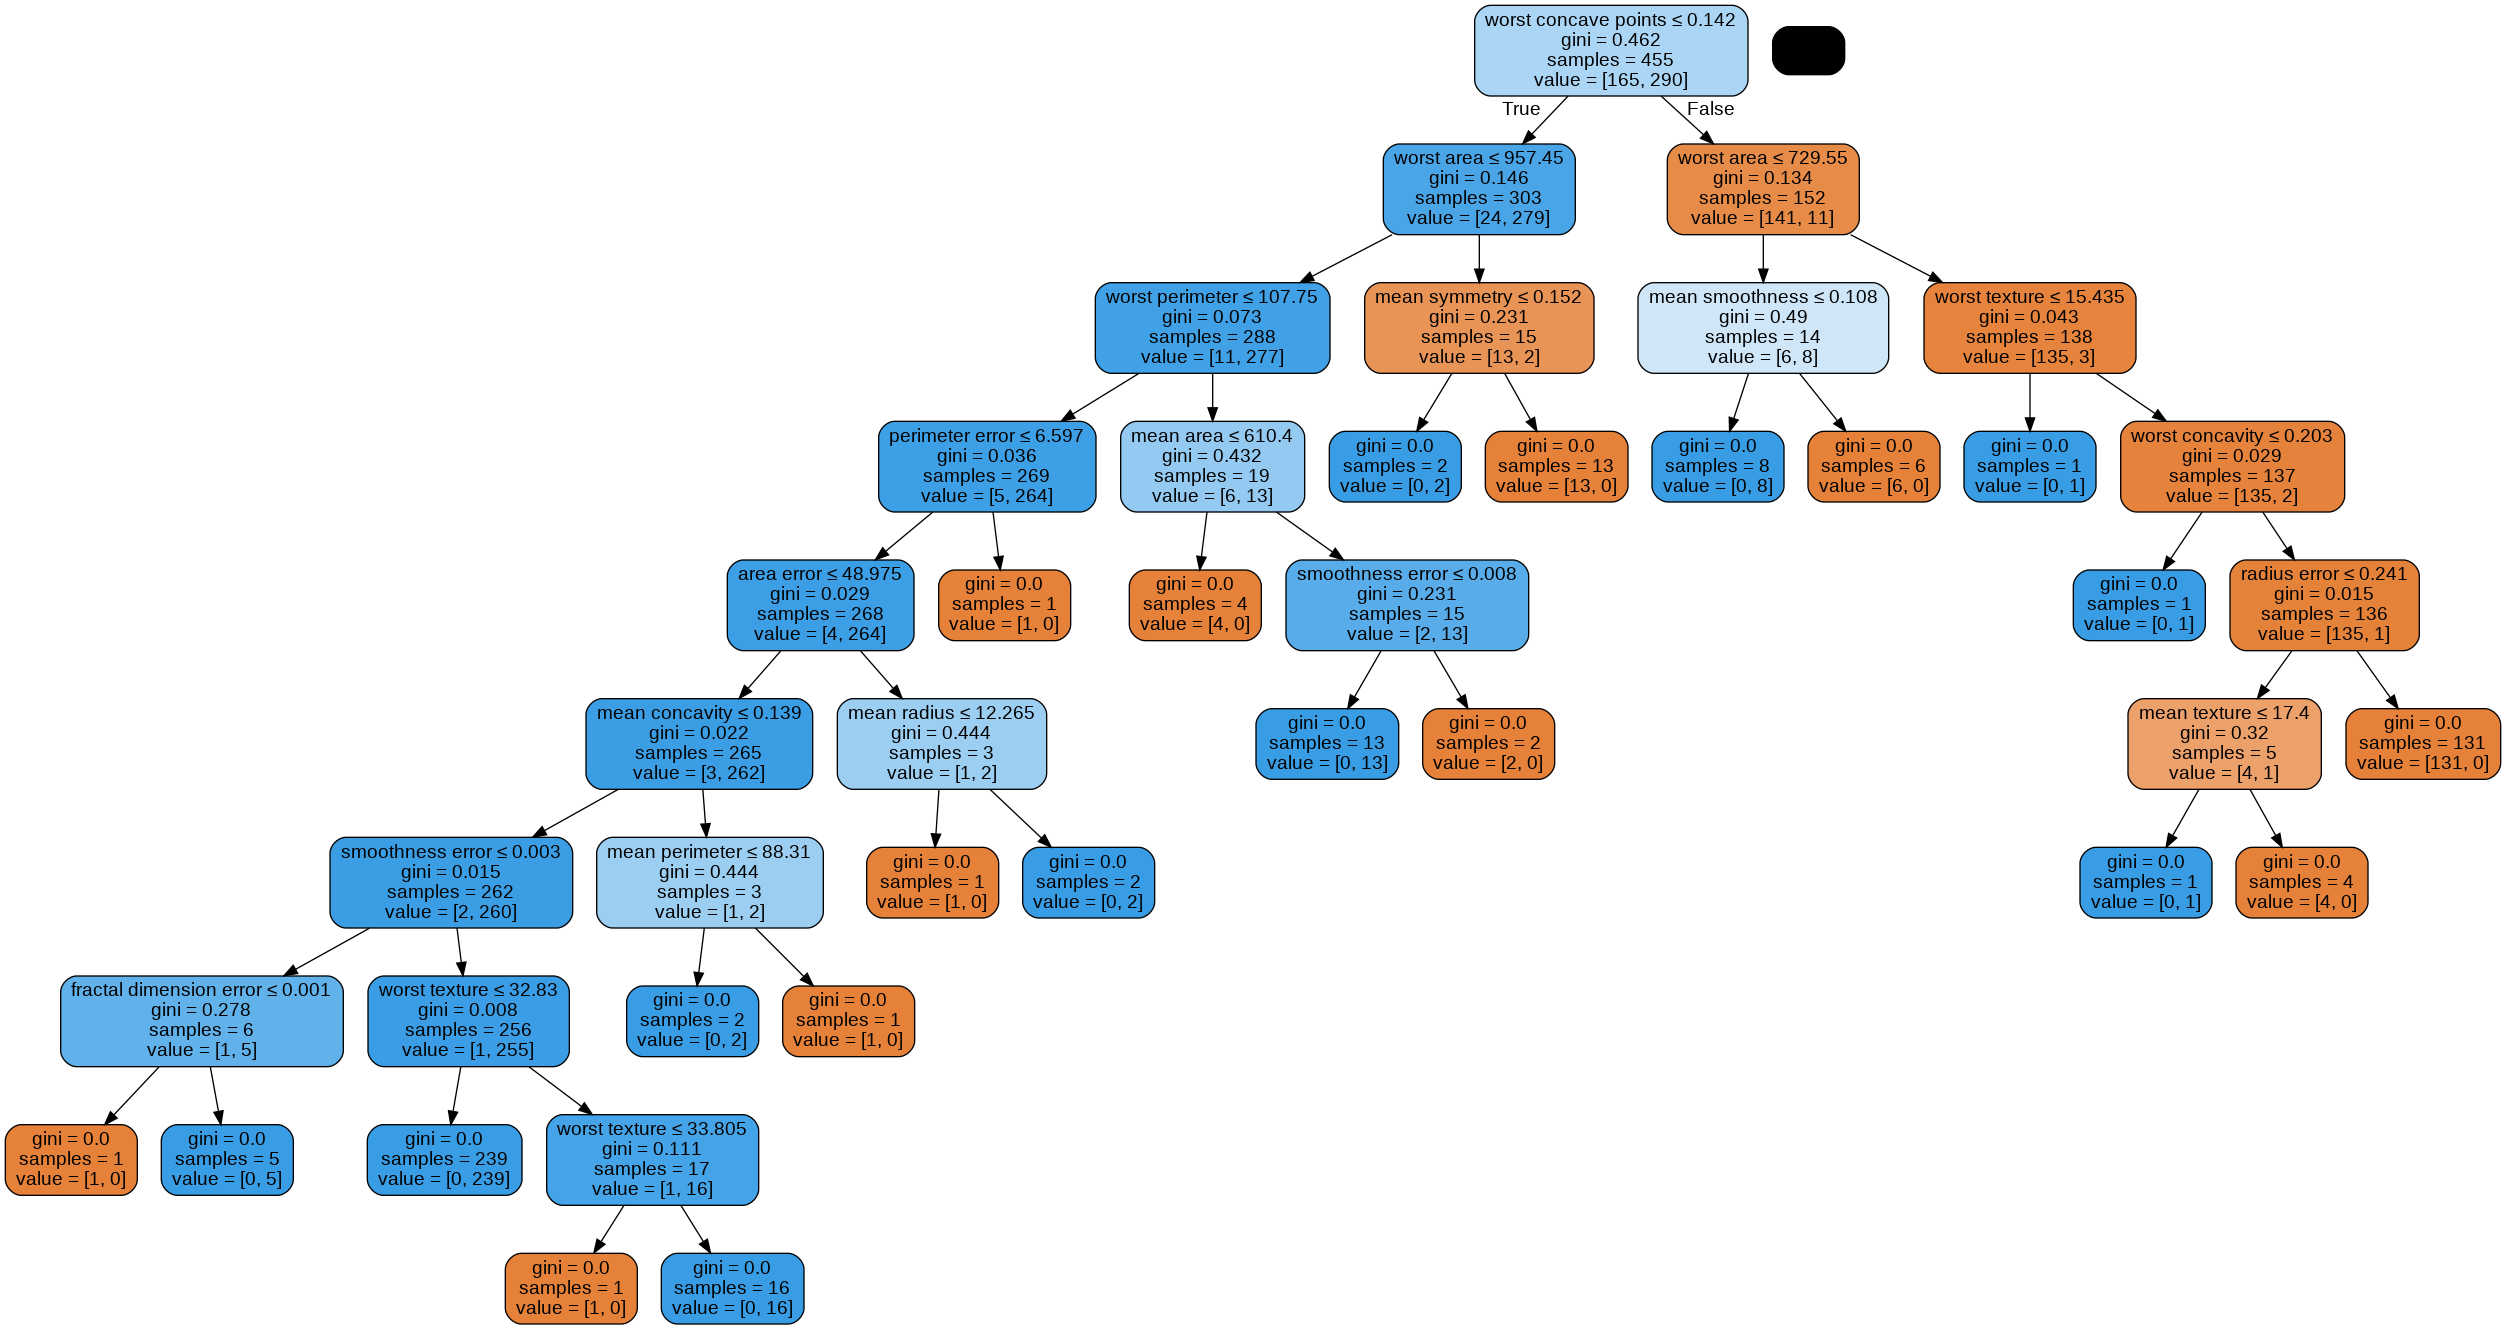

In [20]:
draw_decision_tree(clf)

## 2. 적절한 매개변수를 지정해 모델을 다시 훈련시키고 이를 시각화한 후, 위 그림과 어떻게 달라졌는지 설명해주세요. 
매개변수를 직접 지정해도 되고, 이전에 배운 GridSearchCV를 사용하셔도 좋습니다. 

In [21]:
# Grid Search를 이용한 parameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {"min_samples_leaf":[1, 2, 3, 4, 5, 6, 7, 8, 9], "max_depth":[2, 3, 4, 5, 6, None], "min_samples_split":[2, 3, 4, 5, 6, 7, 8, 9, 10]}

gs = GridSearchCV(clf, parameters)
gs.fit(X_train, y_train)
gs.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

* 하이퍼파라미터를 바꿔준 결과, 모델의 깊이가 줄어든 형태가 나타납니다.
* 즉, 과적합 이전에 깊이를 제한해주어, 최적의 성능을 도출하고자 한 것을 알 수 있습니다.

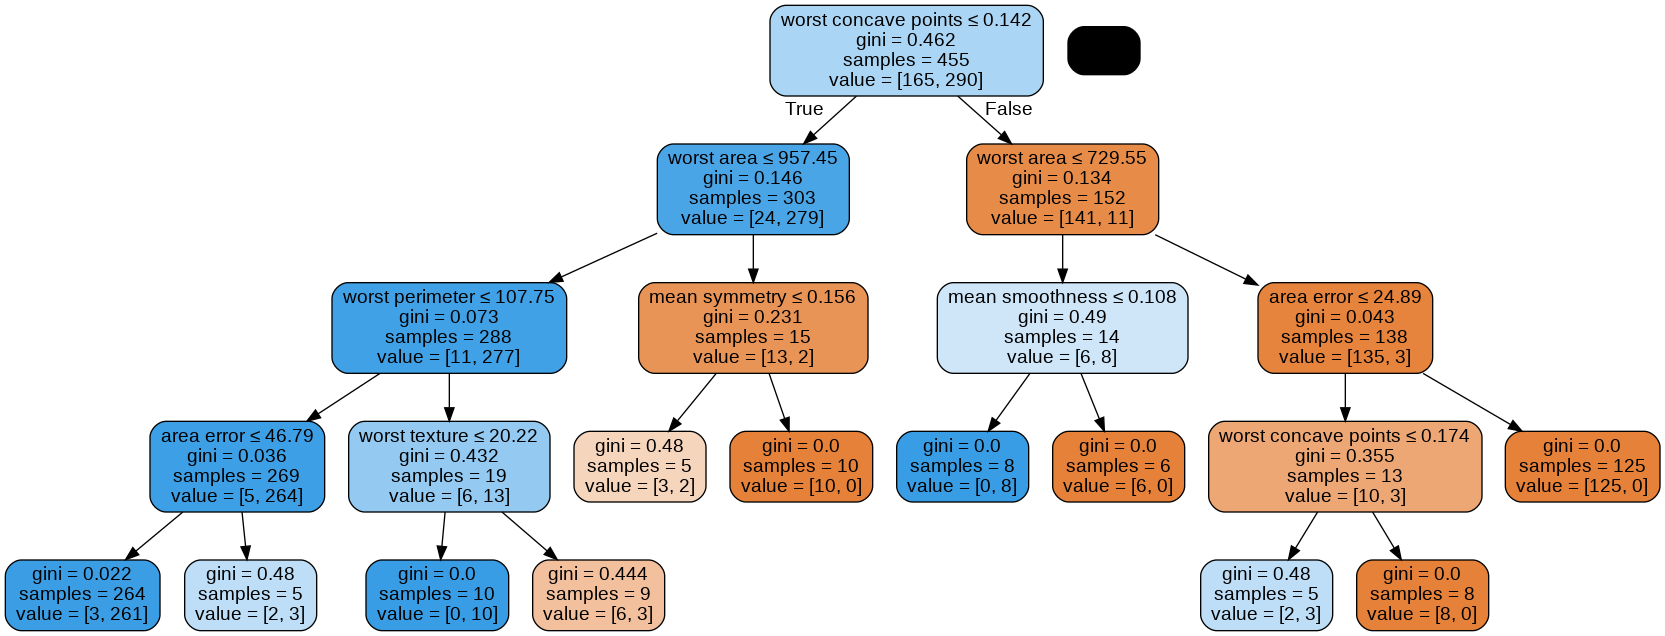

In [22]:
tuned_clf = gs.best_estimator_
draw_decision_tree(tuned_clf)

## 3. 모델을 평가하는 다양한 지표를 사용해 모델을 평가해주세요.

 (accuracy, loss, 오차행렬, f1 score, recall, cross validation 등등 자유롭게 선택)

In [23]:
from sklearn.metrics import accuracy_score, f1_score
y_hat = tuned_clf.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, y_hat)}')
print(f'f1 score: {f1_score(y_test, y_hat)}')

accuracy: 0.9473684210526315
f1 score: 0.9538461538461538
